In [ ]:
import keras, os
import numpy as np
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

import PIL
from io import BytesIO
from IPython.display import display, Image

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

In [ ]:
trdata = ImageDataGenerator(rescale=(1/255))
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/Dataset_Apple_and_Oranges_Gray/train",target_size=(224,224))
tsdata = ImageDataGenerator(1/255)
testdata=tsdata.flow_from_directory(directory='/content/drive/MyDrive/Dataset_Apple_and_Oranges_Gray/test',target_size=(224,224))

Found 2014 images belonging to 2 classes.
Found 519 images belonging to 2 classes.


In [ ]:
from keras.applications.vgg19 import VGG19
vggmodel = VGG19(weights='imagenet',include_top=True)

574726144/574710816 [==============================] - 12s 0us/step


In [ ]:
vggmodel.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layers in (vggmodel.layers)[:23]:
  print(layers)
  layers.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
X=vggmodel.layers[-2].output
predictions = Dense(2,activation="softmax")(X)
model_final=Model(inputs= vggmodel.input,outputs= predictions)

In [ ]:
model_final.compile(loss="categorical_crossentropy",
                    optimizer= optimizers.SGD(learning_rate=0.01, momentum=0.9),metrics=["accuracy"])

In [ ]:
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras.callbacks import ModelCheckpoint ,EarlyStopping
checkpoint = ModelCheckpoint("vgg19_1.h5",monitor='val_accuracy',verbose=1, save_best_file_only=False,save_weights_only=True,mode='auto',peroid=1)
early = EarlyStopping(monitor='val_accuracy',min_delta=0,patience=40,verbose=1,mode='auto')
hist = model_final.fit_generator(generator= traindata, steps_per_epoch=2, epochs=100, verbose=1, validation_data= testdata, validation_steps=2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 19.5777 - accuracy: 0.2969 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


2/2 [==============================] - 128s 56s/step - loss: 25.1099 - accuracy: 0.3125 - val_loss: 6.1722 - val_accuracy: 0.4531
Epoch 2/100
2/2 [==============================] - 75s 58s/step - loss: 2.4342 - accuracy: 0.4896 - val_loss: 1.5308 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 71s 53s/step - loss: 0.6988 - accuracy: 0.4271 - val_loss: 0.9914 - val_accuracy: 0.5156
Epoch 4/100
2/2 [==============================] - 57s 40s/step - loss: 0.7522 - accuracy: 0.5000 - val_loss: 0.9784 - val_accuracy: 0.4375
Epoch 5/100
2/2 [==============================] - 54s 37s/step - loss: 0.7258 - accuracy: 0.5312 - val_loss: 0.7609 - val_accuracy: 0.5938
Epoch 6/100
2/2 [==============================] - 52s 39s/step - loss: 0.7201 - accuracy: 0.4583 - val_loss: 0.7231 - val_accuracy: 0.5469
Epoch 7/100
2/2 [==============================] - 40s 27s/step - loss: 0.7059 - accuracy: 0.4479 - val_loss: 1.2376 - val_accuracy: 0.3906
Epoch 8/100
2/2 [=============

In [ ]:
model_final.save('/content/drive/MyDrive/VGGsave')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/VGGsave/assets


In [ ]:
#Run this first
from tensorflow import keras
model_temp = keras.models.load_model('/content/drive/MyDrive/VGGsave')

In [ ]:
#Save the final weights after training
model_final.save_weights("vgg19_1.h5")


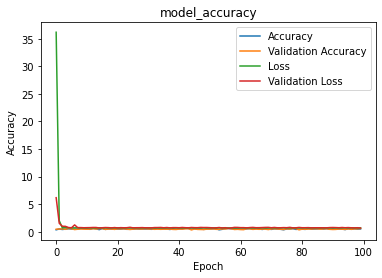

In [ ]:
#To visualise the training/validation accuracy and loss
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model 

#Load the final model for data testing/prediction 
saved_model= model_final.save_weights("vgg19_1.h5")
#saved_model = Load_model("vgg19_1.h5")

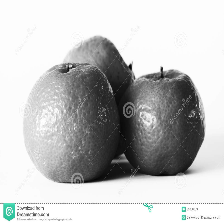

orange


In [ ]:
from io import BytesIO
import PIL
from IPython.display import display, Image 
from keras.preprocessing.image import load_img
from skimage import io
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow
#Display testing data and label below 
def display_img_array(ima):
  im = PIL.Image.fromarray(ima)
  bio=BytesIO()
  im.save(bio, format='png')
  display(Image(bio.getvalue(), format='png'))

urls = "https://thumbs.dreamstime.com/z/grayscale-tangerines-white-tangerins-black-table-83008039.jpg"
img_temp = io.imread(urls)
image_2 = cv.cvtColor(img_temp, cv.COLOR_RGB2BGR)
image = cv.resize(image_2,(224,224))
display_img_array(image)
image=np.expand_dims(image,axis=0)
output=model_final.predict(image)
if output[0][0] > output[0][1]:
  print("orange")
else:
  print("apple")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import Model, load_model
#drive.mount('/content/drive')
model = model_final
weight_kernel = model.layers[1].weights[0].numpy()
print(weight_kernel)

[[[[ 0.34119523  0.09563112  0.0177449  ... -0.11436455 -0.05099866
    -0.00299793]
   [ 0.46418372  0.03355668  0.10245045 ... -0.06945956 -0.04020201
     0.04048637]
   [ 0.39416704 -0.08419707 -0.03631314 ... -0.10720515 -0.03804016
     0.04690642]]

  [[ 0.33999205  0.13363543  0.02129423 ... -0.13025227 -0.16508926
    -0.06969624]
   [ 0.41810837  0.05260524  0.09755926 ... -0.09385028 -0.20492788
    -0.0573062 ]
   [ 0.37740308 -0.07876257 -0.04775979 ... -0.11827433 -0.19008617
    -0.01889699]]

  [[-0.04484424  0.06471398 -0.07631404 ... -0.12629718 -0.29905206
    -0.2825364 ]
   [-0.04806903 -0.00658076 -0.02234544 ... -0.0878844  -0.3915486
    -0.34632796]
   [-0.04594866 -0.11583115 -0.14462094 ... -0.12290562 -0.35782176
    -0.27979308]]]


 [[[ 0.23215917  0.133657    0.12134422 ... -0.1063385   0.28406844
     0.3594997 ]
   [ 0.30511212  0.05677647  0.21688674 ... -0.06828708  0.3440761
     0.44033417]
   [ 0.2671299  -0.07969447  0.05988706 ... -0.09225675  0.

In [ ]:
#Bias Print
import ctypes
import struct
def float_to_bin(num):
    return format(struct.unpack('!I', struct.pack('!f', num))[0], '032b')

for layers in model_final.layers:
  a=str(layers.name)
  if 'conv' in a:
    w= layers.weights[1].numpy()
    with open(layers.name + "_gray_bias.txt".format(layers),"w") as temp:
      for x in w:
        temp.write(float_to_bin(x))
        temp.write("\n")
        

In [ ]:
#Nháp
for layers in model_final.layers:
  a=str(layers.name)
  if "conv" in a:
   print(a)

block1_conv1
block1_conv2
block2_conv1
block2_conv2
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block5_conv1
block5_conv2
block5_conv3
block5_conv4


In [ ]:
#Nháp
for layers in model_final.layers:
  a=str(layers.name)
  if "bias" in a:
   print(a)

In [ ]:
#Kernel Print
from keras.models import Model, load_model
import ctypes
import struct
def float_to_bin(num):
    return format(struct.unpack('!I', struct.pack('!f', num))[0], '032b')
#drive.mount('/content/drive')
model = model_temp
weight_kernel = model.layers[1].weights[0].numpy()
matrix=[]
#for x in weight_kernel:
 #for i in x:
  # a=[]
   #a.append(x)
   #for i in a:
     #matrix.append(i)
#print(matrix)
for layers in model.layers :
  a=str(layers.name)
  if 'conv' in a:
    w= layers.weights[0].numpy()
    with open(layers.name + "_gray_kernel.txt".format(layers),"w") as temp:
     for x in w:
      for y in x:
        for a in y:
          for b in a:
           temp.write(float_to_bin(b))
           temp.write("\n") 
  
